# Real Estate Price Prediction

Gayrimenkul Fiyat Tahmini, evler, daireler veya ticari binalar gibi gayrimenkul mülklerinin gelecekteki fiyatlarını tahmin etme veya öngörme sürecidir. Amaç, alıcılara, satıcılara, yatırımcılara ve gayrimenkul profesyonellerine gayrimenkul işlemleri hakkında bilinçli kararlar almaları için doğru emlak oranları sağlamaktır.<p>
Bu projemizde gayrimenkullerin fiyatlarını tahmin eden bir model olusturacagiz

<img src="https://www.hepsiemlak.com/emlak-yasam/wp-content/uploads/2018/06/gayrimenkul-ofisinin-basarili-olmasi-icin-neler-yapilmali-3.jpg">

<a href="https://thecleverprogrammer.com/2023/12/11/real-estate-price-prediction-using-python/"> Dataya Buradan erisebilirsiniz</a>

<b>Transaction date / İşlem tarihi :</b> Taşınmazın işlem gördüğü tarih.<br>
<b>House age / Evin yaşı :</b> Emlakın yıl cinsinden yaşı.<br>
<b>Distance to the nearest MRT station / En yakın MRT istasyonuna uzaklık :</b> En yakın Toplu Taşıma İstasyonuna (MRT) yakınlık, kolaylık ve erişilebilirlik açısından önemli bir faktördür.<br>
<b>Number of convenience stores / Market sayısı :</b> Mülkün temel olanaklara erişilebilirliğini gösteren, yakın çevredeki market sayısı.<br>
<b>Latitude and Longitude / Enlem ve Boylam :</b> Gayrimenkulün konumunu yansıtan coğrafi koordinatları.<br>
<b>House price of unit area / Birim alan konut fiyatı :</b> Hedef değişken, birim alan başına düşen konut fiyatını ifade eder.<br>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("Real_Estate.csv")

### EDA

In [9]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [10]:
df.shape

(414, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [12]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [13]:
df["Transaction date"].unique()

array(['2012-09-02 16:42:30.519336', '2012-09-04 22:52:29.919544',
       '2012-09-05 01:10:52.349449', '2012-09-05 13:26:01.189083',
       '2012-09-06 08:29:47.910523', '2012-09-06 14:18:34.142030',
       '2012-09-06 15:07:23.396013', '2012-09-07 07:57:25.291322',
       '2012-09-07 10:06:48.384148', '2012-09-07 13:21:33.254701',
       '2012-09-07 20:42:58.363599', '2012-09-07 21:36:29.294109',
       '2012-09-08 01:05:20.095597', '2012-09-09 09:29:47.768544',
       '2012-09-09 17:24:50.129628', '2012-09-11 19:06:31.002528',
       '2012-09-12 05:03:03.332710', '2012-09-12 06:54:06.555817',
       '2012-09-12 23:27:33.301004', '2012-09-14 06:14:19.030272',
       '2012-09-16 01:53:06.000222', '2012-09-19 00:48:38.873410',
       '2012-09-19 08:08:21.403851', '2012-09-19 16:28:39.921640',
       '2012-09-20 04:20:08.912777', '2012-09-20 13:50:20.328592',
       '2012-09-21 07:30:38.941907', '2012-09-22 03:31:31.593518',
       '2012-09-22 13:31:16.610764', '2012-09-22 15:04:04.7743

In [14]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


# Feature Engineering

In [16]:
df["Transaction date"]=pd.to_datetime(df["Transaction date"])  # tarih formatına çeviriyoruz

In [17]:
df["year"]=df["Transaction date"].dt.year
df["month"]=df["Transaction date"].dt.month  # Sadece yıl ve ayi alıyoruz

In [18]:
df=df.drop("Transaction date",axis=1)  #eski tarih sütunumuzu siliyoruz

<Axes: >

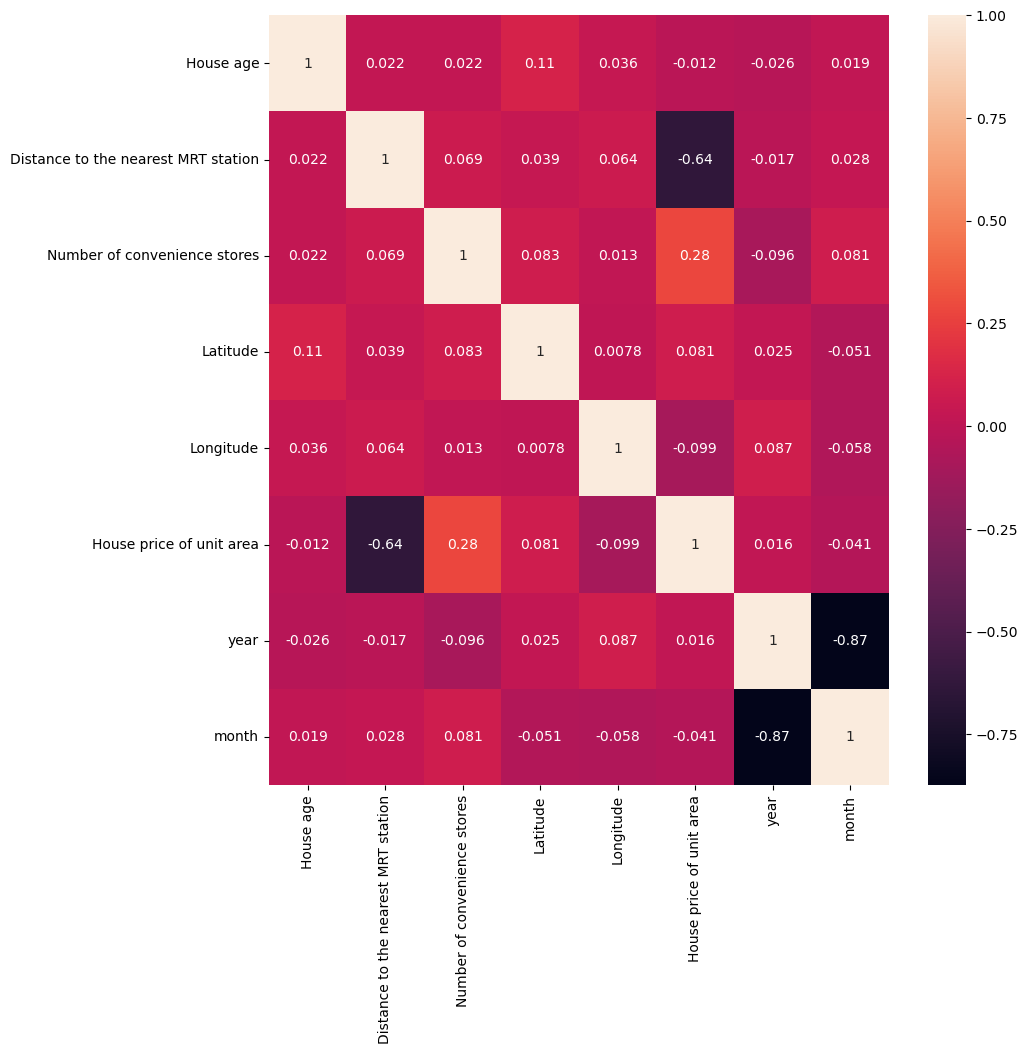

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [20]:
df["Number of convenience stores"]=df["Number of convenience stores"]**2
df["Distance to the nearest MRT station"]=df["Distance to the nearest MRT station"]**2
# bu sütunlari daha öenmli gördugumuz icin karelerini aldik

### Modelling

In [22]:
x=df.drop("House price of unit area",axis=1)
y=df["House price of unit area"]
# Deep Learning için yedek ayırıyorum
xd=df.drop("House price of unit area",axis=1)
yd=df["House price of unit area"]

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

       
        
        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [24]:
algo_test(x,y)

,R_Squared,RMSE,MAE
KNeighborsRegressor,5.153219e-01,1.157939e+01,1.004668e+01
Gradient Boosting,4.742648e-01,1.205987e+01,1.000379e+01
Lasso,4.424657e-01,1.241924e+01,1.052697e+01
SVR,4.405646e-01,1.244039e+01,1.021288e+01
ElasticNet,4.403424e-01,1.244286e+01,1.055317e+01
Ridge,4.193682e-01,1.267388e+01,1.073344e+01
AdaBoost,4.188519e-01,1.267951e+01,1.035972e+01
XGBRegressor,4.171673e-01,1.269788e+01,1.058974e+01
Linear,4.143836e-01,1.272816e+01,1.068082e+01
Decision Tree,1.985898e-01,1.488972e+01,1.181440e+01


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [27]:
lr=LinearRegression()

In [28]:
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
tahmin=lr.predict(x_test)

In [30]:
r2_score(y_test,tahmin)

0.41438364936597316

In [31]:
mean_squared_error(y_test,tahmin)**.5

12.728163146571461

#### Feature Importance

In [33]:
feature_importance = pd.DataFrame({"Feature":x_train.columns,"Coefs":lr.coef_})

In [34]:
feature_importance=feature_importance.sort_values(by="Coefs",ascending=False)

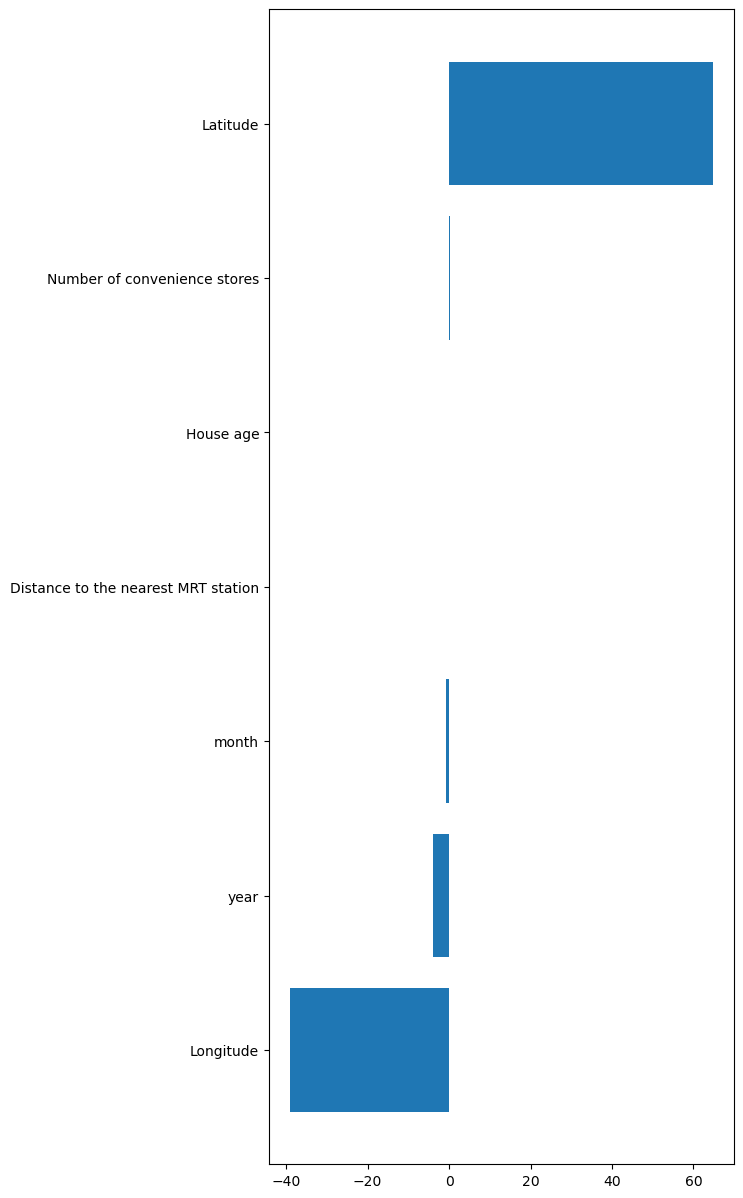

In [35]:
plt.figure(figsize=(6,15))
plt.barh(feature_importance["Feature"],feature_importance["Coefs"])
plt.gca().invert_yaxis() 

#### Residuals 

In [37]:
residuals=y_test-tahmin

<Axes: xlabel='House price of unit area', ylabel='Count'>

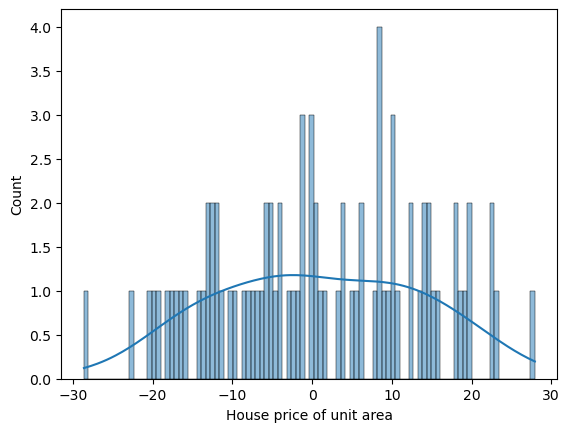

In [38]:
sns.histplot(residuals,kde=True,bins=100)

<Axes: xlabel='House price of unit area', ylabel='Density'>

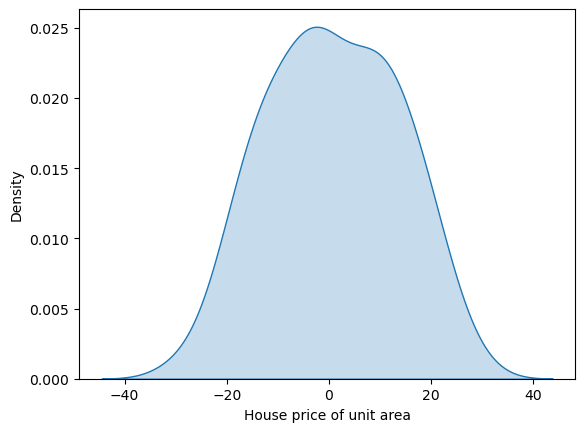

In [39]:
sns.kdeplot(residuals, fill=True)

In [40]:
model=lr.fit(x,y)

In [41]:
import pickle

In [42]:
pickle.dump(model,open("menkul.pkl","wb")) # Eğittiğimiz modeli kaydediyoruz

### Deep Learning

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [45]:
from sklearn.preprocessing import normalize, scale

In [46]:
xd=scale(xd)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(xd,yd,test_size=.20 ,random_state=42)

In [48]:
model=Sequential()
model.add(Dense(120,activation="relu")) 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1)) 
model.compile(loss="mse", optimizer="adam")                                                                           

In [49]:
history=model.fit(x_train,y_train ,validation_data=(x_test,y_test), batch_size=128, epochs=500)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - loss: 1101.3760 - val_loss: 1205.1331
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1066.0542 - val_loss: 1204.8489
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1054.5483 - val_loss: 1204.5885
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1071.9554 - val_loss: 1204.1523
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1048.9963 - val_loss: 1203.0763
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1060.3624 - val_loss: 1201.1040
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1093.3290 - val_loss: 1197.6522
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1063.6876 - val_loss: 1191.7823
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1060.2986 - val_loss: 1184.7728
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1065.9315 - val_loss: 1176.0631
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1062.0510 - val_loss: 1164.9341
Epoch 1

In [50]:
tahmin=model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [51]:
mean_squared_error(tahmin,y_test)**.5

14.720178897293772

In [52]:
r2_score(tahmin,y_test)

0.22438502237096114

In [53]:
loss_f=pd.DataFrame(history.history)

<Axes: >

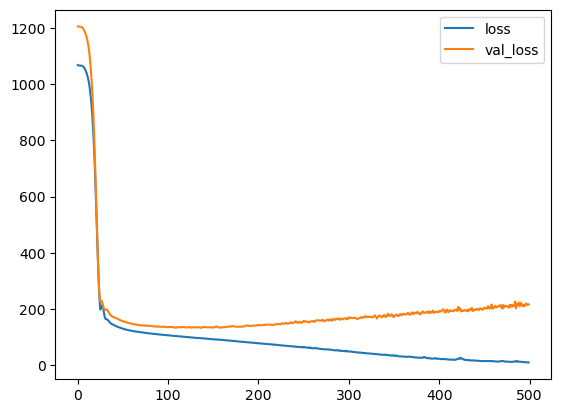

In [54]:
loss_f.plot()

Sonuc olarak fiyat tahmin eden bir model olusturup modelimizi kaydettik ve bir streamlit uygulaması olusturduk. Deep Learning ile de modelimizi eğittik ama çok iyi bir skor elde edemedik. Verilerin azlığından kaynaklandığını düşünüyorum